# Scapy Standard Mode Adapted Model Trained on AWID 

The purpose of this notebook is to train a multi-class model that can detect the 3 attacks: Deauth, ARP Spoofing, and Rogue Access Point. Using only features that can be captured using Scapy python Framework in the Standard Ethernet capture mode. This model can be used in systems where data is captured using the standard scapy mode which is simple rather than the Monitor Mode which requires a more Complex setup.

## Data Preprocessing

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spoofing/13.Website_spoofing/Website_spoofing_8.csv
/kaggle/input/spoofing/13.Website_spoofing/Website_spoofing_1.csv
/kaggle/input/spoofing/13.Website_spoofing/Website_spoofing_6.csv
/kaggle/input/spoofing/13.Website_spoofing/Website_spoofing_46.csv
/kaggle/input/spoofing/13.Website_spoofing/Website_spoofing_24.csv
/kaggle/input/spoofing/13.Website_spoofing/Website_spoofing_37.csv
/kaggle/input/spoofing/13.Website_spoofing/Website_spoofing_34.csv
/kaggle/input/spoofing/13.Website_spoofing/Website_spoofing_10.csv
/kaggle/input/spoofing/13.Website_spoofing/Website_spoofing_26.csv
/kaggle/input/spoofing/13.Website_spoofing/Website_spoofing_40.csv
/kaggle/input/spoofing/13.Website_spoofing/Website_spoofing_42.csv
/kaggle/input/spoofing/13.Website_spoofing/Website_spoofing_13.csv
/kaggle/input/spoofing/13.Website_spoofing/Website_spoofing_53.csv
/kaggle/input/spoofing/13.Website_spoofing/Website_spoofing_52.csv
/kaggle/input/spoofing/13.Website_spoofing/Website_spoofing_49.cs

In [1]:
import pandas as pd
import glob

# Define attack categories and their respective paths
attack_paths = {
    "deauth": "/kaggle/input/deauth/1.Deauth/*.csv",
    "rogue_ap": "/kaggle/input/impersonation/4.Rogue_AP/*.csv",
    "website_spoofing": "/kaggle/input/spoofing/13.Website_spoofing/*.csv"
}

# Dictionary to store merged data
merged_data = {}

# Loop through each attack type and merge corresponding CSV files
for attack, path in attack_paths.items():
    all_files = glob.glob(path)  # Get all CSV file paths for the attack type
    df_list = [pd.read_csv(file, low_memory=False) for file in all_files]  # Read all CSVs
    merged_df = pd.concat(df_list, ignore_index=True)  # Merge dataframes
    merged_data[attack] = merged_df  # Store merged dataframe
    print(f"Merged {len(all_files)} files for {attack} attack.")

# Display summary of merged datasets
for attack, df in merged_data.items():
    print(f"\n{attack.upper()} Attack Dataset:")
    print(df.info())  # Display dataset information

Merged 33 files for deauth attack.
Merged 40 files for rogue_ap attack.
Merged 54 files for website_spoofing attack.

DEAUTH Attack Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1626469 entries, 0 to 1626468
Columns: 254 entries, frame.encap_type to Label
dtypes: float64(89), int64(22), object(143)
memory usage: 3.1+ GB
None

ROGUE_AP Attack Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973185 entries, 0 to 1973184
Columns: 254 entries, frame.encap_type to Label
dtypes: float64(86), int64(21), object(147)
memory usage: 3.7+ GB
None

WEBSITE_SPOOFING Attack Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668567 entries, 0 to 2668566
Columns: 254 entries, frame.encap_type to Label
dtypes: float64(89), int64(24), object(141)
memory usage: 5.1+ GB
None


In [2]:
merged_data["deauth"].columns.tolist()

['frame.encap_type',
 'frame.len',
 'frame.number',
 'frame.time',
 'frame.time_delta',
 'frame.time_delta_displayed',
 'frame.time_epoch',
 'frame.time_relative',
 'radiotap.channel.flags.cck',
 'radiotap.channel.flags.ofdm',
 'radiotap.channel.freq',
 'radiotap.datarate',
 'radiotap.dbm_antsignal',
 'radiotap.length',
 'radiotap.mactime',
 'radiotap.present.tsft',
 'radiotap.rxflags',
 'radiotap.timestamp.ts',
 'radiotap.vendor_oui',
 'wlan.duration',
 'wlan.analysis.kck',
 'wlan.analysis.kek',
 'wlan.bssid',
 'wlan.country_info.fnm',
 'wlan.country_info.code',
 'wlan.da',
 'wlan.fc.ds',
 'wlan.fc.frag',
 'wlan.fc.order',
 'wlan.fc.moredata',
 'wlan.fc.protected',
 'wlan.fc.pwrmgt',
 'wlan.fc.type',
 'wlan.fc.retry',
 'wlan.fc.subtype',
 'wlan.fcs.bad_checksum',
 'wlan.fixed.beacon',
 'wlan.fixed.capabilities.ess',
 'wlan.fixed.capabilities.ibss',
 'wlan.fixed.reason_code',
 'wlan.fixed.timestamp',
 'wlan.ra',
 'wlan_radio.duration',
 'wlan.rsn.ie.gtk.key',
 'wlan.rsn.ie.igtk.key',
 

In [3]:
merged_data.keys()

dict_keys(['deauth', 'rogue_ap', 'website_spoofing'])

Here we will select only the columns which were compatible with what we could capture using Scapy. And then we start investigating the Nan Values present in this dataset for the selected columns.


--- DEAUTH ---
NaN percentage per column:
arp.src.hw_mac        99.933598
arp.src.proto_ipv4    99.933598
arp.dst.hw_mac        99.933598
arp.dst.proto_ipv4    99.933598
arp.opcode            99.933598
udp.dstport           98.094277
udp.srcport           98.094277
udp.length            98.094277
tcp.flags.ack         71.724330
tcp.time_relative     71.724330
tcp.srcport           71.724330
tcp.flags.reset       71.724330
tcp.flags.fin         71.724330
tcp.flags.syn         71.724330
tcp.seq               71.724330
tcp.dstport           71.724330
tcp.ack               71.724330
ip.ttl                69.896383
ip.proto              69.896383
ip.dst                69.896383
ip.src                69.896383
ip.version            69.833547
frame.len              0.000000
frame.time_epoch       0.000000
Label                  0.000000


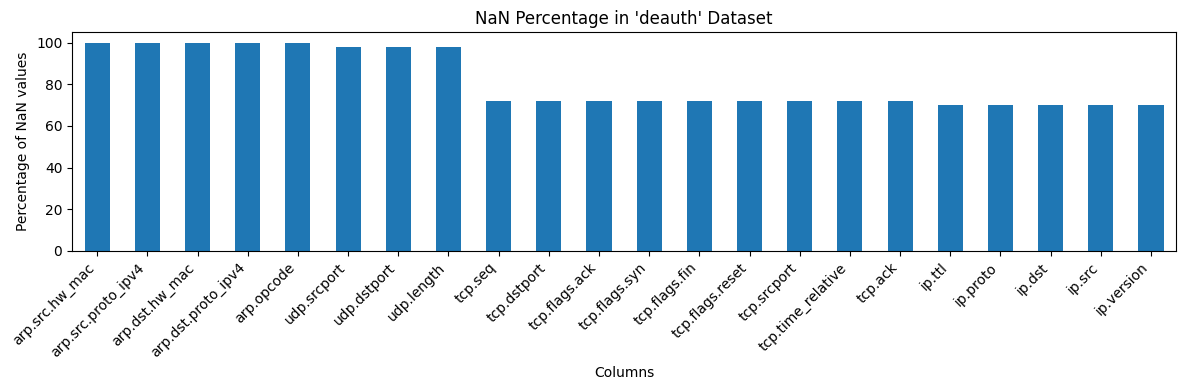


--- ROGUE_AP ---
NaN percentage per column:
arp.src.hw_mac        99.951297
arp.src.proto_ipv4    99.951297
arp.dst.hw_mac        99.951297
arp.dst.proto_ipv4    99.951297
arp.opcode            99.951297
udp.dstport           98.151314
udp.srcport           98.151314
udp.length            98.151314
tcp.flags.ack         67.574302
tcp.time_relative     67.574302
tcp.srcport           67.574302
tcp.flags.reset       67.574302
tcp.flags.fin         67.574302
tcp.flags.syn         67.574302
tcp.seq               67.574302
tcp.dstport           67.574302
tcp.ack               67.574302
ip.ttl                65.807514
ip.proto              65.807514
ip.dst                65.807514
ip.src                65.807514
ip.version            65.736158
frame.len              0.000000
frame.time_epoch       0.000000
Label                  0.000000


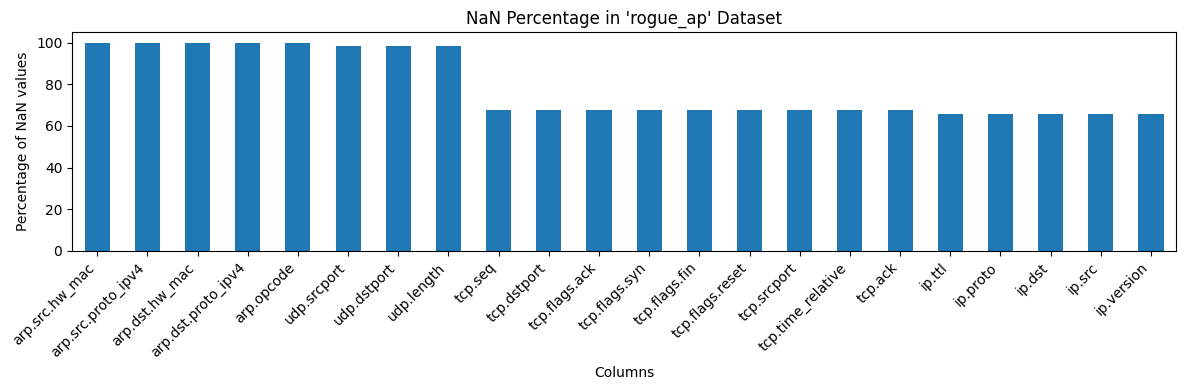


--- WEBSITE_SPOOFING ---
NaN percentage per column:
udp.dstport           98.584521
udp.srcport           98.584521
udp.length            98.584521
arp.src.hw_mac        88.215323
arp.src.proto_ipv4    88.215323
arp.dst.hw_mac        88.215323
arp.dst.proto_ipv4    88.215323
arp.opcode            88.215323
tcp.flags.ack         72.884361
tcp.time_relative     72.884361
tcp.flags.reset       72.884361
tcp.flags.fin         72.884361
tcp.ack               72.884361
tcp.flags.syn         72.884361
tcp.srcport           72.882525
tcp.seq               72.882525
tcp.dstport           72.882525
ip.ttl                71.519021
ip.proto              71.519021
ip.dst                71.519021
ip.src                71.519021
ip.version            71.472592
frame.len              0.000000
frame.time_epoch       0.000000
Label                  0.000000


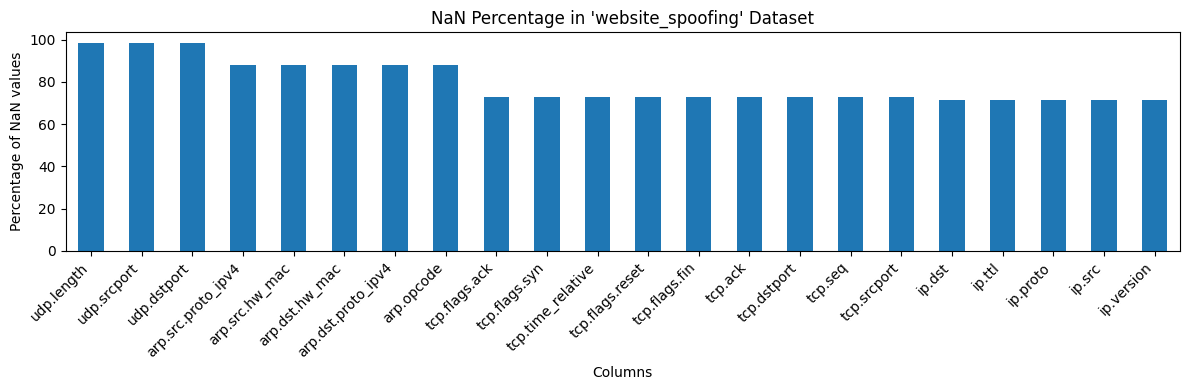

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Your selected Scapy-compatible columns
selected_columns = [
    'frame.len', 'frame.time_epoch',
    'arp.src.hw_mac', 'arp.src.proto_ipv4', 'arp.dst.hw_mac', 'arp.dst.proto_ipv4', 'arp.opcode',
    'ip.src', 'ip.dst', 'ip.proto', 'ip.ttl', 'ip.version',
    'tcp.seq', 'tcp.ack', 'tcp.dstport', 'tcp.flags.ack', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.flags.reset',
    'tcp.srcport', 'tcp.time_relative',
    'udp.dstport', 'udp.srcport', 'udp.length',
    'Label'
]

# Store filtered data if needed later
filtered_data = {}

# Process each dataset
for attack_type, df in merged_data.items():
    print(f"\n--- {attack_type.upper()} ---")
    
    # Only keep columns that exist in the current DataFrame
    existing_cols = [col for col in selected_columns if col in df.columns]
    filtered_df = df[existing_cols].copy()
    filtered_data[attack_type] = filtered_df  # Save filtered version

    if filtered_df.empty:
        print("No matching columns or empty dataset.")
        continue

    # Calculate NaN percentages
    nan_percent = filtered_df.isna().mean() * 100
    print("NaN percentage per column:")
    print(nan_percent.sort_values(ascending=False).to_string())

    # Plot
    nan_percent[nan_percent > 0].sort_values(ascending=False).plot(
        kind='bar', figsize=(12, 4),
        title=f"NaN Percentage in '{attack_type}' Dataset"
    )
    plt.ylabel("Percentage of NaN values")
    plt.xlabel("Columns")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

We first drop columns that will be irrelevant for the model training, the exact time epoch for instance or the IP addresses, even if they could be captured using Scapy.

In [5]:
# dropping irrelevant features
# Columns we decided to drop for modeling (not useful / not generalizable)
columns_to_drop = [
    'frame.time_epoch',
    'ip.src', 'ip.dst',
    'tcp.seq', 'tcp.ack'
]

# Drop those columns if they exist in each filtered dataset
for attack_type in filtered_data:
    df = filtered_data[attack_type]
    drop_these = [col for col in columns_to_drop if col in df.columns]
    filtered_data[attack_type] = df.drop(columns=drop_these)

print("\n✅ Irrelevant columns dropped from filtered_data.")



✅ Irrelevant columns dropped from filtered_data.


Now, we drop columns that contained more than 80% of Nan values. Since any attempt of imputing them would result in a misclasification for our model, or a poor performance. And then we check for any complete rows that are left with no Nan Values. Those rows would be the most intersting for our model training, as they contain complete information.

In [6]:
# Step 1: Drop columns with more than 90% NaNs
filtered_data_cleaned = {}

nan_threshold = 0.8 

for attack_type, df in filtered_data.items():
    # Drop columns where >80% of values are NaN
    df_cleaned = df.loc[:, df.isna().mean() < nan_threshold]
    filtered_data_cleaned[attack_type] = df_cleaned

# Step 2: Check complete rows (0 NaNs)
for attack_type, df in filtered_data_cleaned.items():
    total_rows = len(df)
    if total_rows == 0:
        print(f"\n🟡 '{attack_type}' has no rows after filtering.")
        continue

    complete_rows = df.dropna().shape[0]
    percentage_complete = (complete_rows / total_rows) * 100

    print(f"\n✅ '{attack_type}': {percentage_complete:.2f}% of rows are complete (no NaNs)")
    print(f"Total rows: {total_rows}, Complete rows: {complete_rows}, Droppable rows: {total_rows - complete_rows}")


✅ 'deauth': 28.28% of rows are complete (no NaNs)
Total rows: 1626469, Complete rows: 459895, Droppable rows: 1166574

✅ 'rogue_ap': 32.43% of rows are complete (no NaNs)
Total rows: 1973185, Complete rows: 639819, Droppable rows: 1333366

✅ 'website_spoofing': 27.12% of rows are complete (no NaNs)
Total rows: 2668567, Complete rows: 723599, Droppable rows: 1944968


In [7]:
filtered_data_cleaned['deauth'].shape

(1626469, 12)

In [8]:
filtered_data_cleaned['deauth'].columns

Index(['frame.len', 'ip.proto', 'ip.ttl', 'ip.version', 'tcp.dstport',
       'tcp.flags.ack', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.flags.reset',
       'tcp.srcport', 'tcp.time_relative', 'Label'],
      dtype='object')

Since the percentage of the complete rows is relatively small, we investigate further if we have enough rows that contain a few number of Missing values in them.

In [9]:
from collections import Counter

for attack_type, df in filtered_data_cleaned.items():
    print(f"\n📊 NaN count distribution for rows in '{attack_type}' dataset:")

    # Count how many NaNs are in each row
    nan_counts = df.isna().sum(axis=1)

    # Count how many rows have 0, 1, 2, ... NaNs
    count_by_nan = Counter(nan_counts)

    total_rows = len(df)

    # Print sorted by number of NaNs (ascending)
    for nan_num in sorted(count_by_nan):
        count = count_by_nan[nan_num]
        percentage = (count / total_rows) * 100
        print(f"  {count} rows ({percentage:.2f}%) have {nan_num} NaN value(s)")



📊 NaN count distribution for rows in 'deauth' dataset:
  459895 rows (28.28%) have 0 NaN value(s)
  29731 rows (1.83%) have 7 NaN value(s)
  1022 rows (0.06%) have 9 NaN value(s)
  1135821 rows (69.83%) have 10 NaN value(s)

📊 NaN count distribution for rows in 'rogue_ap' dataset:
  639819 rows (32.43%) have 0 NaN value(s)
  34862 rows (1.77%) have 7 NaN value(s)
  1408 rows (0.07%) have 9 NaN value(s)
  1297096 rows (65.74%) have 10 NaN value(s)

📊 NaN count distribution for rows in 'website_spoofing' dataset:
  723599 rows (27.12%) have 0 NaN value(s)
  49 rows (0.00%) have 5 NaN value(s)
  36386 rows (1.36%) have 7 NaN value(s)
  1239 rows (0.05%) have 9 NaN value(s)
  1907294 rows (71.47%) have 10 NaN value(s)


Taking things further, we investigate the distribution of the missing values in rows with the distribution of the Labels for each row. This will prevent us from removing rows that we need, just for the sake of eliminating the missing values.

In [10]:
from collections import Counter

for attack_type, df in filtered_data_cleaned.items():
    print(f"\n📊 NaN count distribution for rows in '{attack_type}' dataset:")

    # Count NaNs per row
    nan_counts = df.isna().sum(axis=1)
    total_rows = len(df)

    # Group rows by number of NaNs
    count_by_nan = Counter(nan_counts)

    for nan_num in sorted(count_by_nan):
        count = count_by_nan[nan_num]
        percentage = (count / total_rows) * 100
        print(f"\n  🧮 {count} rows ({percentage:.2f}%) have {nan_num} NaN value(s)")

        # Filter rows with this specific NaN count
        subset = df[nan_counts == nan_num]

        # Show label distribution in that subset
        if 'Label' in subset.columns:
            label_counts = subset['Label'].value_counts()
            for label, label_count in label_counts.items():
                label_pct = (label_count / count) * 100
                print(f"     - {label_count} rows ({label_pct:.2f}%) labeled as '{label}'")



📊 NaN count distribution for rows in 'deauth' dataset:

  🧮 459895 rows (28.28%) have 0 NaN value(s)
     - 459895 rows (100.00%) labeled as 'Normal'

  🧮 29731 rows (1.83%) have 7 NaN value(s)
     - 29731 rows (100.00%) labeled as 'Normal'

  🧮 1022 rows (0.06%) have 9 NaN value(s)
     - 1022 rows (100.00%) labeled as 'Normal'

  🧮 1135821 rows (69.83%) have 10 NaN value(s)
     - 1096879 rows (96.57%) labeled as 'Normal'
     - 38942 rows (3.43%) labeled as 'Deauth'

📊 NaN count distribution for rows in 'rogue_ap' dataset:

  🧮 639819 rows (32.43%) have 0 NaN value(s)
     - 639819 rows (100.00%) labeled as 'Normal'

  🧮 34862 rows (1.77%) have 7 NaN value(s)
     - 34862 rows (100.00%) labeled as 'Normal'

  🧮 1408 rows (0.07%) have 9 NaN value(s)
     - 1408 rows (100.00%) labeled as 'Normal'

  🧮 1297096 rows (65.74%) have 10 NaN value(s)
     - 1295786 rows (99.90%) labeled as 'Normal'
     - 1310 rows (0.10%) labeled as 'RogueAP'

📊 NaN count distribution for rows in 'website

### Suggested Solution: keeping only complete rows with allowing some of the incomplete rows in order to not lose some classes

In [11]:
import pandas as pd

combined_dfs = []

for attack_type, df in filtered_data_cleaned.items():
    if attack_type == 'website_spoofing':
        # Keep only fully clean rows (as before)
        cleaned = df.dropna().copy()
    else:
        # Separate attack and normal rows
        attack_rows = df[df['Label'] != 'Normal'].copy()  # keep all attack rows (even with NaNs)
        normal_rows = df[(df['Label'] == 'Normal') & (~df.isna().any(axis=1))].copy()  # only clean normal rows
        cleaned = pd.concat([attack_rows, normal_rows], ignore_index=True)

    combined_dfs.append(cleaned)

# Combine all
combined_df = pd.concat(combined_dfs, ignore_index=True)

# Show summary
print(f"\n✅ Combined dataset shape: {combined_df.shape}")
print("Class label distribution (from 'Label' column):")
print(combined_df['Label'].value_counts())



✅ Combined dataset shape: (1863565, 12)
Class label distribution (from 'Label' column):
Label
Normal              1741528
Website_spoofing      81785
Deauth                38942
RogueAP                1310
Name: count, dtype: int64


In [12]:
# Step 1: Check total and percentage of NaNs in each column
total_rows = len(combined_df)
nan_report = combined_df.isna().sum().to_frame(name="NaN Count")
nan_report["% of Total Rows"] = (nan_report["NaN Count"] / total_rows) * 100
nan_report = nan_report[nan_report["NaN Count"] > 0]  # Only show columns that still have NaNs

# Step 2: Display
print("\n📊 NaN Summary in Combined Dataset:")
print(nan_report.sort_values(by="% of Total Rows", ascending=False).to_string())



📊 NaN Summary in Combined Dataset:
                   NaN Count  % of Total Rows
ip.proto               40252         2.159946
ip.ttl                 40252         2.159946
ip.version             40252         2.159946
tcp.dstport            40252         2.159946
tcp.flags.ack          40252         2.159946
tcp.flags.syn          40252         2.159946
tcp.flags.fin          40252         2.159946
tcp.flags.reset        40252         2.159946
tcp.srcport            40252         2.159946
tcp.time_relative      40252         2.159946


#### Missing Values Imputation & Column type conversion

In [13]:
# Step 1: Separate numeric and non-numeric columns
numeric_cols = combined_df.select_dtypes(include=['number']).columns
non_numeric_cols = combined_df.select_dtypes(exclude=['number']).columns

# Step 2: Impute numeric NaNs with median (from Normal samples)
normal_df = combined_df[combined_df['Label'] == 'Normal']
numeric_medians = normal_df[numeric_cols].median()

imputed_df = combined_df.copy()
imputed_df[numeric_cols] = imputed_df[numeric_cols].fillna(numeric_medians)

# Step 3: Impute non-numeric NaNs with placeholder
imputed_df[non_numeric_cols] = imputed_df[non_numeric_cols].fillna("unknown")

# Step 4: Final check
total_remaining_nans = imputed_df.isna().sum().sum()
print(f"\n✅ NaNs remaining after full imputation: {total_remaining_nans}")


✅ NaNs remaining after full imputation: 0


In [14]:
imputed_df.head()

,frame.len,ip.proto,ip.ttl,ip.version,tcp.dstport,tcp.flags.ack,tcp.flags.syn,tcp.flags.fin,tcp.flags.reset,tcp.srcport,tcp.time_relative,Label
0,86,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Deauth
1,86,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Deauth
2,86,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Deauth
3,86,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Deauth
4,86,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Deauth


In [19]:
imputed_df.dtypes

frame.len             int64
ip.proto             object
ip.ttl               object
ip.version           object
tcp.dstport          object
tcp.flags.ack        object
tcp.flags.syn        object
tcp.flags.fin        object
tcp.flags.reset      object
tcp.srcport          object
tcp.time_relative    object
Label                object
Label_encoded         int64
dtype: object

In [22]:
# List of all columns that should be numeric (besides 'frame.len')
numeric_like_columns = [
    'ip.proto', 'ip.ttl', 'ip.version',
    'tcp.dstport', 'tcp.flags.ack', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.flags.reset',
    'tcp.srcport', 'tcp.time_relative'
]

# Convert all to numeric using errors='coerce' (invalid strings → NaN)
for col in numeric_like_columns:
    imputed_df[col] = pd.to_numeric(imputed_df[col], errors='coerce')

# Final fill of any remaining NaNs with -1 (neutral value for attacker samples)
imputed_df[numeric_like_columns] = imputed_df[numeric_like_columns].fillna(-1)

# Confirm cleanup
print("\n✅ All target columns converted to numeric with fallback.")
print(imputed_df[numeric_like_columns].dtypes)
print(f"Remaining NaNs: {imputed_df[numeric_like_columns].isna().sum().sum()}")



✅ All target columns converted to numeric with fallback.
ip.proto             float64
ip.ttl               float64
ip.version           float64
tcp.dstport          float64
tcp.flags.ack        float64
tcp.flags.syn        float64
tcp.flags.fin        float64
tcp.flags.reset      float64
tcp.srcport          float64
tcp.time_relative    float64
dtype: object
Remaining NaNs: 0


### Model Training


📊 Classification Report:
                  precision    recall  f1-score   support

          Deauth       1.00      1.00      1.00     11683
          Normal       1.00      1.00      1.00    522459
         RogueAP       1.00      1.00      1.00       393
Website_spoofing       0.97      0.98      0.98     24535

        accuracy                           1.00    559070
       macro avg       0.99      1.00      0.99    559070
    weighted avg       1.00      1.00      1.00    559070


🌟 Macro F1-Score: 0.9938


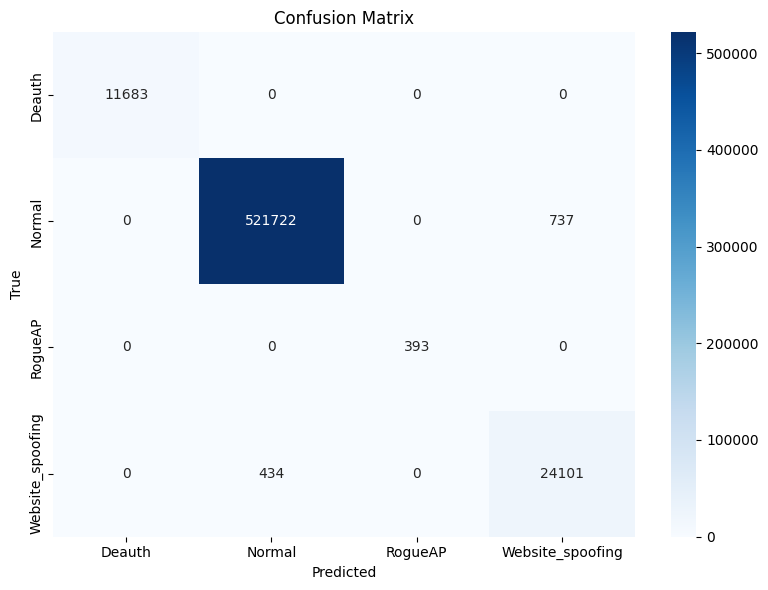

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Encode labels
label_encoder = LabelEncoder()
imputed_df['Label_encoded'] = label_encoder.fit_transform(imputed_df['Label'])

# Step 2: Prepare features and target
X = imputed_df.drop(columns=['Label', 'Label_encoded'])
y = imputed_df['Label_encoded']

# Step 3: Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

# Step 4: Train model (we can use class_weight='balanced' to handle imbalance)
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Step 5: Predict
y_pred = clf.predict(X_test)

# Step 6: Evaluation
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"\n🌟 Macro F1-Score: {macro_f1:.4f}")

# Step 7: Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


Feature Importance will help us make a more efficient model with a yet excellent performance.


📊 Top Feature Importances:
          Feature  Importance
        frame.len    0.391474
      tcp.srcport    0.207916
      tcp.dstport    0.103543
           ip.ttl    0.061824
    tcp.flags.fin    0.058381
  tcp.flags.reset    0.048500
tcp.time_relative    0.047468
    tcp.flags.ack    0.042032
    tcp.flags.syn    0.038844
         ip.proto    0.000011
       ip.version    0.000008


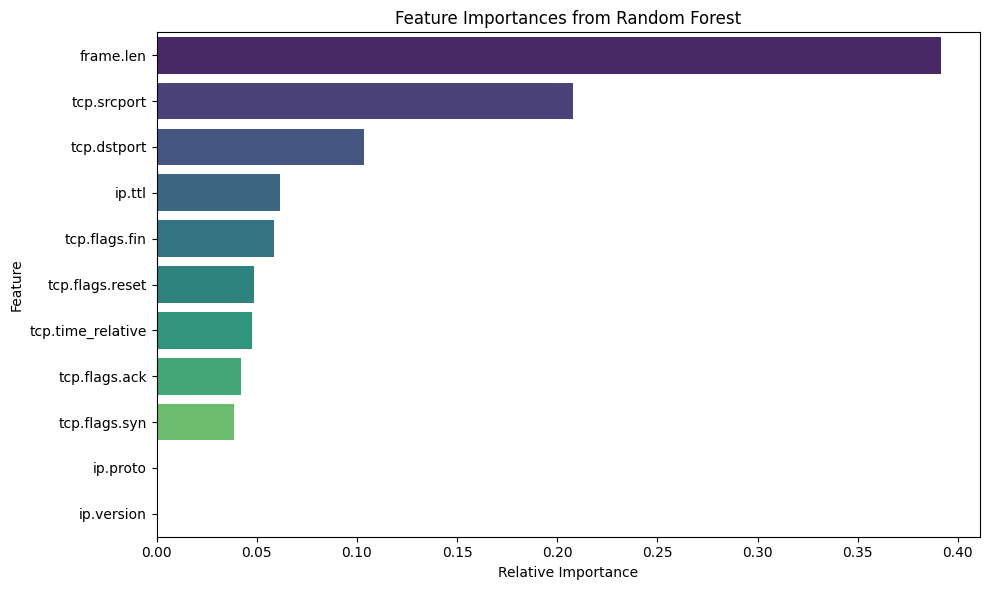

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Get feature names (used for training)
feature_names = X.columns

# Step 2: Get importances from trained model
importances = clf.feature_importances_

# Step 3: Create a sorted DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Step 4: Print top features
print("\n📊 Top Feature Importances:")
print(importance_df.to_string(index=False))

# Step 5: Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



📊 Classification Report:
                  precision    recall  f1-score   support

          Deauth       1.00      1.00      1.00     11683
          Normal       1.00      0.99      1.00    522459
         RogueAP       1.00      1.00      1.00       393
Website_spoofing       0.89      0.99      0.94     24535

        accuracy                           0.99    559070
       macro avg       0.97      1.00      0.98    559070
    weighted avg       0.99      0.99      0.99    559070


🌟 Macro F1-Score (reduced model): 0.9835


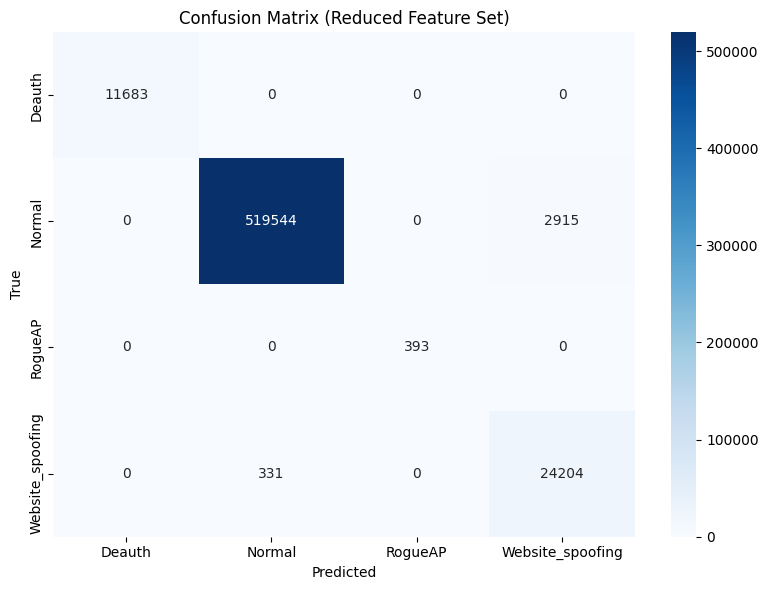

In [28]:
selected_features = [
    'frame.len',
    'tcp.srcport',
    'tcp.dstport',
    'ip.ttl',
    'tcp.flags.fin',
    'tcp.flags.reset',
]

# Step 1: Trim features
X = imputed_df[selected_features]
y = imputed_df['Label_encoded']

# Step 2: Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

# Step 3: Train lightweight model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Step 4: Evaluate
from sklearn.metrics import classification_report, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"\n🌟 Macro F1-Score (reduced model): {macro_f1:.4f}")

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix (Reduced Feature Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


In [29]:
import joblib

# Save trained model
joblib.dump(clf, 'standard_scapy_awid_model.pkl')

# Save label encoder for decoding predictions later
joblib.dump(label_encoder, 'label_encoder_standard_scapy_awid.pkl')

print("✅ Model and label encoder saved.")


✅ Model and label encoder saved.


In [30]:
# Reconstruct final dataset for export (features + label)
final_dataset = X.copy()
final_dataset['Label'] = imputed_df['Label']

# Save as CSV
final_dataset.to_csv('standard_scapy_awid_dataset.csv', index=False)

print("✅ Final dataset saved as 'standard_scapy_awid_dataset.csv'")


✅ Final dataset saved as 'standard_scapy_awid_dataset.csv'
